# AT1 Part B: NLP for data analysis (Python code + Markdown report) by HEMANG SHARMA (24695785)

It had been over a year since the COVID-19 pandemic had turned the world upside down. As the number of cases continued to rise, healthcare providers and public health officials were working tirelessly to find a solution. 

Finally, a vaccine was developed and made available to the public. But, despite the efforts of healthcare providers and public health officials, many people were hesitant to get vaccinated. This is where chatbots come into the play. One such chatbot was used by VIRADialogs, this chatbot/virtual agent is designed to provide information about vaccines. VIRADialogs made is avaible to researchers at <a href="vaxchat.org/research">vaxchat.org/research</a>

That's when Dr. Emily, a public health researcher, turned to the COVID-19 Vaccine Trust Annotations dataset. The dataset contained 3,022 user inputs, each annotated for trust, and Dr. Emily was determined to use it to gain insights into people's attitudes towards the vaccine and its distribution.

Dr. Emily was well aware of python language, so she decided to use her programming skills to find patterns and insights.

She begain with loading all the required libraries and dataset to her project. 

In [29]:
import pandas as pd
import numpy as np
import random
import mercury
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import string
import re
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from wordcloud import WordCloud
#nltk.downloader.download('vader_lexicon')
#nltk.download('omw-1.4')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

hs = pd.read_csv('dev.csv')
hs_test = pd.read_csv('test.csv')
hs_train = pd.read_csv('train.csv')

print("Size of 'dev.csv':", hs.shape)
print("Size of 'train.csv':",hs_train.shape)
print("Size of 'test.csv':",hs_test.shape)

Size of 'dev.csv': (299, 2)
Size of 'train.csv': (1815, 2)
Size of 'test.csv': (908, 2)


The dataset provided by the VIRADialogs is a Trust Classification dataset contains annotations of High trust, Low institutional trust and Low agent trust in user inputs to VIRA. There are three csv files namely, "dev.csv", "test.csv" and "train.csv". Each csv file contains excatly 2 columns - 'text' and 'label'.

But soon she realised that she needs to perform data cleaning methods on the data set. So she exicuted the following code on the dataset.

In [30]:
hemang = pd.concat([hs_train, hs_test, hs], axis=0)
hemang.dropna()
total = hemang.isnull().sum().sort_values(ascending=False)
percent = (hemang.isnull().sum() / hemang.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data


#1. Removing duplicates:
#Duplicate data can be removed to ensure that the data is unique
hemang.drop_duplicates(inplace=True)

#2. Standardizing data:
#Data can be standardized by converting all the values to a common scale or format. 
#In our case we are converting all strings values to lowercase
# Convert all string values to lowercase
hemang['text'] = hemang['text'].str.lower()

#3. Handling outliers:
#Outliers are values that are significantly different from other values in the dataset. These can be 
#identified using various statistical techniques, and then either replaced or removed from the dataset.

from scipy import stats

zscore = stats.zscore(hemang['label'])
abszscores = np.abs(zscore)
filtered_entries = (abszscores < 3)
hemang = hemang[filtered_entries]



def clean_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    # join words to form a sentence
    text = ' '.join(lemmatized_text)
    return text

hemang['text'] = hemang['text'].apply(lambda x: clean_text(x))

The data was cleaned by removing unnecessary characters, stop words, and lemmatizing the text.

Using the data, she created a pie chart to visualize the distribution of trust labels in the dataset:

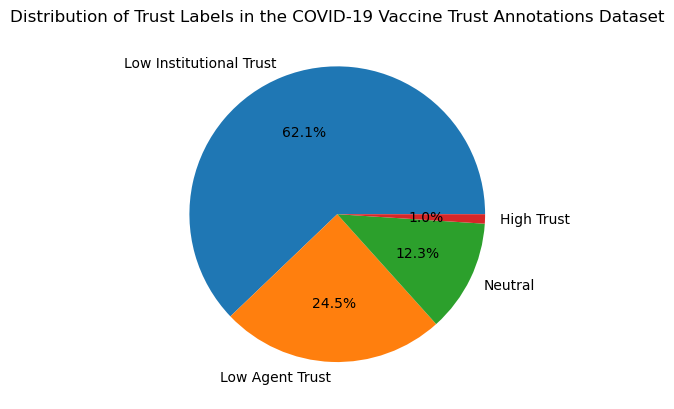

In [31]:
# Count the number of occurrences of each trust label
trust_counts = hemang['label'].value_counts()

# Create the pie chart
labels = ['Low Institutional Trust', 'Low Agent Trust', 'Neutral', 'High Trust']
plt.pie(trust_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Trust Labels in the COVID-19 Vaccine Trust Annotations Dataset')

# Display the pie chart
plt.show()

The chart showed that the majority of the inputs were labeled as neutral, with roughly equal numbers of inputs labeled as high trust, low institutional trust, and low agent trust.

Now, Dr. Emily performed some text analysis on the data.

In [32]:
r = random.randrange(0, 299)
s = hs['text'][r]
print(s,end="\n\n")
print("Length of the input text: ",len(s.split()))
avg_word_len = np.mean([len(w) for w in str(s).split()])
sent_count = len(sent_tokenize(s))
print("Average word length in the input text: ",avg_word_len)
print("Sentence Count: ",sent_count)

will the vaccine stop the delta variant?

Length of the input text:  7
Average word length in the input text:  4.857142857142857
Sentence Count:  1


In [36]:
# Character counts
hemang["char_count"] = hemang["text"].map(lambda x: len(x))
# Word counts
hemang["word_count"] = hemang["text"].map(lambda x: len(x.split()))
# Sentence counts
hemang["sent_count"] = hemang["text"].map(lambda x: len(sent_tokenize(x)))
# String counts
hemang["hashtag_count"] = hemang["text"].map(lambda x: x.count("#"))
# Average word length
hemang["avg_word_len"] = hemang["text"].map(lambda x: np.mean([len(w) for w in str(x).split()]))
# Average sentence length
hemang["avg_sent_len"] = hemang["text"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))
hemang

/Users/hemang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hemang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,text,label,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
0,symptomatic patient got vaccine dy,0,34,5,1,0,6.000000,5.0
1,anyone died getting pfizer moderna johnson joh...,0,58,8,1,0,6.375000,8.0
2,trust pharmaceutical company manipulate data,0,44,5,1,0,8.000000,5.0
3,antisense rna could dsrna contaminating covid ...,0,83,12,1,0,6.000000,12.0
4,vaccine arent fda approved,0,26,4,1,0,5.750000,4.0
...,...,...,...,...,...,...,...,...
294,advisable get vaccine day healing covid,3,39,6,1,0,5.666667,6.0
295,get vaccinated,3,14,2,1,0,6.500000,2.0
296,thinking getting j j history dvts also coumadi...,3,94,16,1,0,4.937500,16.0
297,get booster,3,11,2,1,0,5.000000,2.0


In [37]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    
    return text
hemang["text_clean"] = hemang["text"].map(lambda x: clean_text(x))
stop = set(stopwords.words("english"))
corpus = [word for i in hemang["text_clean"].str.split().values.tolist() for word in i if (word not in stop)]
most_common = FreqDist(corpus).most_common(30)

In [20]:
#print(corpus)
#most_common

Dr. Emily then wanted to look at the most frequent words in the dataset. Using the data frame, she created a word cloud to visualize the most frequent words as well as a bar chart:

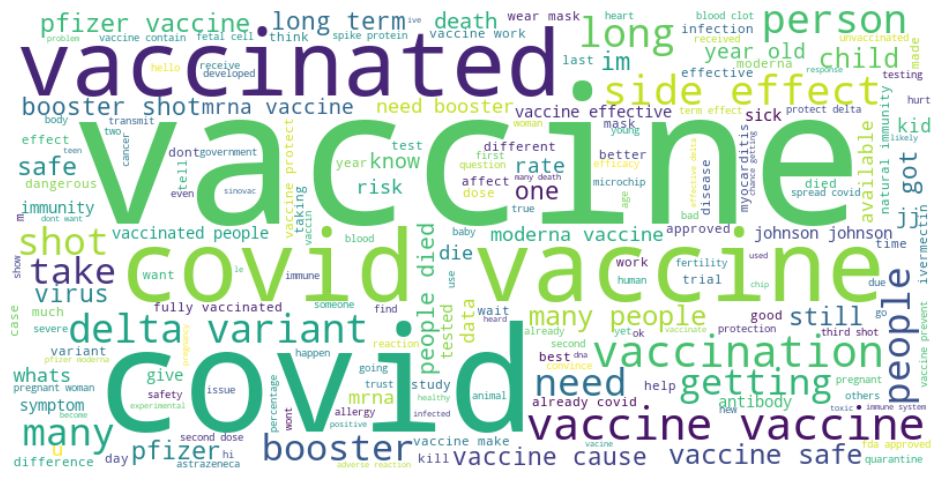

In [39]:
# Combine all text inputs into a single string
text = ' '.join(hemang['text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hemang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


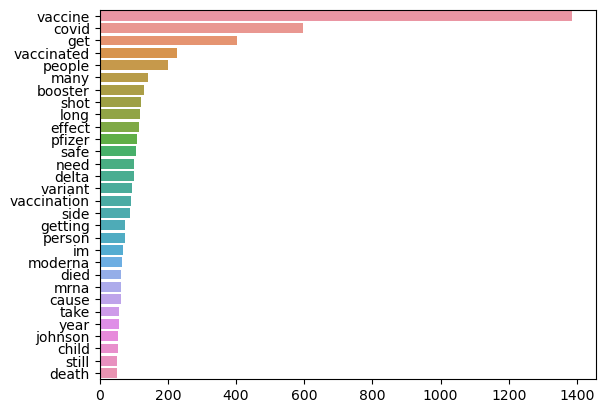

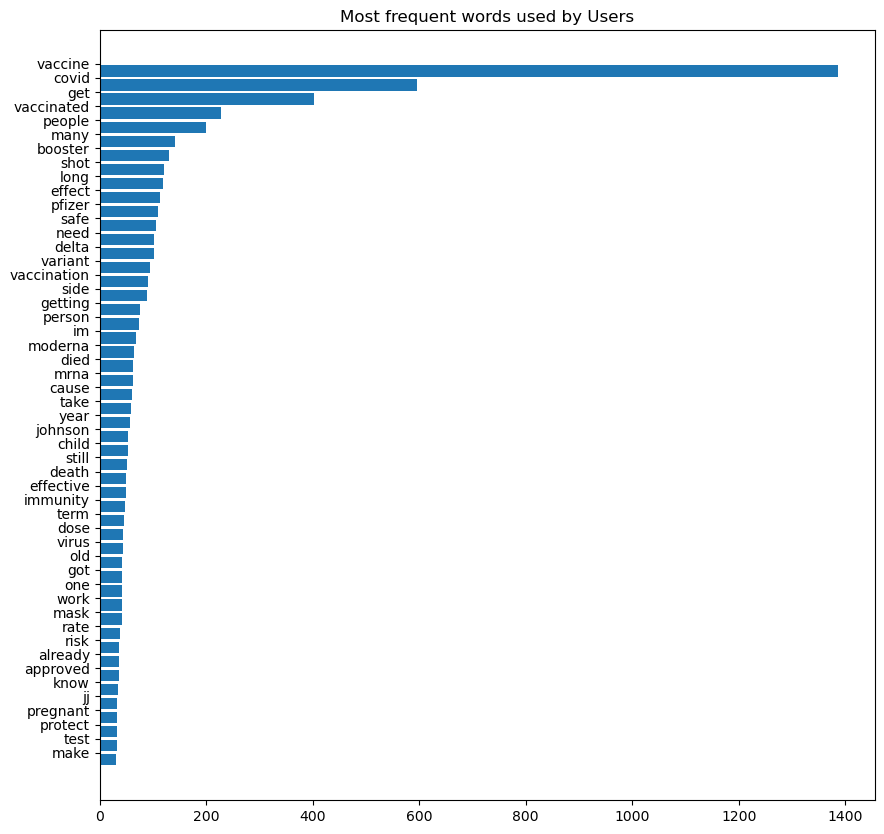

In [40]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

nltk.download('stopwords')
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()
plt.figure(figsize=(10,10))
wordBarGraphFunction(hemang,'text',"Most frequent words used by Users")

The word cloud showed that the most frequent words in the dataset were related to vaccine, COVID, booster, get and vaccinated. This confirmed Dr. Emily's suspicion that trust was a key factor in determining people's willingness to get vaccinated.

Now Dr. Emily wanted to know what are least trusted inputs and the most trusted inputs by the users.

In [24]:
#Least trusted
hemang.sort_values(by='label').head(10)

,text,label,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len,text_clean
0,symptomatic patient got vaccine dy,0,34,5,1,0,6.000000,5.0,symptomatic patient got vaccine dy
45,gat vaccine still got covid dont think vacine ...,0,50,9,1,0,4.666667,9.0,gat vaccine still got covid dont think vacine ...
46,vaccine graphene inside,0,23,3,1,0,7.000000,3.0,vaccine graphene inside
47,many person needed intensive care vaccination,0,45,6,1,0,6.666667,6.0,many person needed intensive care vaccination
48,many vaccineinduced immune thromboses,0,37,4,1,0,8.500000,4.0,many vaccineinduced immune thromboses
49,dont want vaccine government conspiring steril...,0,51,7,1,0,6.428571,7.0,dont want vaccine government conspiring steril...
50,grapheneoxide vaccine,0,21,2,1,0,10.000000,2.0,grapheneoxide vaccine
51,die vaccine,0,11,2,1,0,5.000000,2.0,die vaccine
52,covid vaccine cause myocarditis,0,31,4,1,0,7.000000,4.0,covid vaccine cause myocarditis
53,much testing really vaccine,0,27,4,1,0,6.000000,4.0,much testing really vaccine


In [25]:
#Most trusted
hemang.sort_values(by='label', ascending=False).head(10)

,text,label,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len,text_clean
298,many booster shot need,3,22,4,1,0,4.750000,4.0,many booster shot need
807,need booster shot,3,17,3,1,0,5.000000,3.0,need booster shot
1755,long stand immunization,3,23,3,1,0,7.000000,3.0,long stand immunization
1756,get vaccinated,3,14,2,1,0,6.500000,2.0,get vaccinated
1757,year old live area many unvaccinatedwould bett...,3,115,16,1,0,6.250000,16.0,year old live area many unvaccinatedwould bett...
1758,geta vaccine,3,12,2,1,0,5.500000,2.0,geta vaccine
1759,fully vaccinated since march pfizer,3,35,5,1,0,6.200000,5.0,fully vaccinated since march pfizer
1760,get covid vaccine houston,3,25,4,1,0,5.500000,4.0,get covid vaccine houston
1761,long wait covid getting vaccine,3,31,5,1,0,5.400000,5.0,long wait covid getting vaccine
1762,need show driver license get vaccine,3,36,6,1,0,5.166667,6.0,need show driver license get vaccine


After finding out about least trusted inputs and the most trusted inputs by the users, she wanted to perform frequency and sentiment analysis on the dataset. So she wrote few more lines of code.

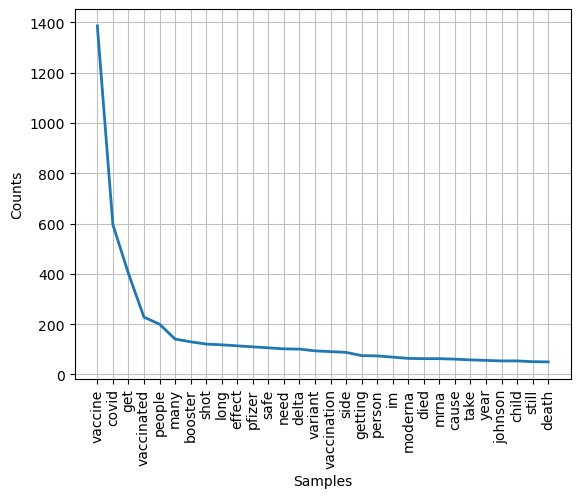

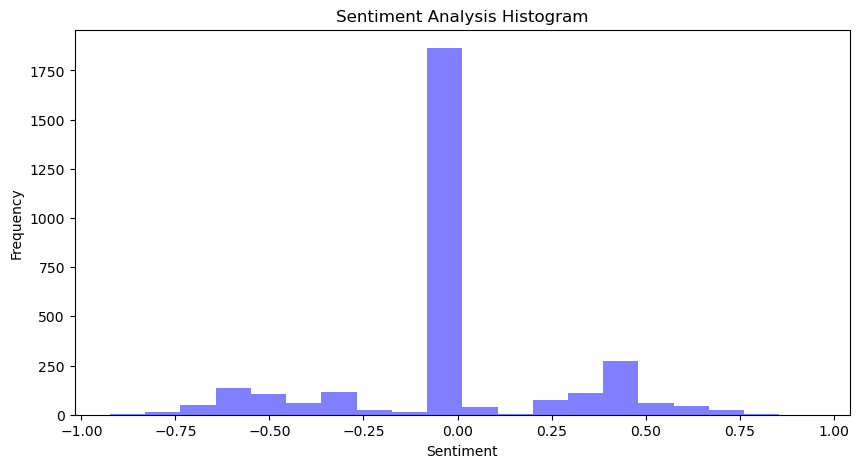

In [26]:
# frequency analysis
def freq_analysis(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    return fdist

fdist = freq_analysis(hemang['text'].str.cat(sep=' '))
fdist.plot(30)

# sentiment analysis
def sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

hemang['sentiment'] = hemang['text'].apply(lambda x: sentiment_analysis(x))

# sentiment analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)['compound']
    return sentiment

hemang['sentiment'] = hemang['text'].apply(get_sentiment)

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(hemang['sentiment'], bins=20, color='blue', alpha=0.5)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Sentiment Analysis Histogram')

plt.show()

She further created few graphs on her analysis. She ploted a histogram of the sentiment scores for the text data, with the x-axis representing the sentiment score and the y-axis representing the frequency of that sentiment score in the data. She used this histogram to identify the overall sentiment of the text data, as well as any patterns or trends in the sentiment over time or across different categories.

Armed with these insights, Dr. Emily developed a communication strategy aimed at increasing trust in the vaccine and its distribution. She worked with local healthcare providers and community leaders to host information sessions and answer people's questions about the vaccine. She also utilized social media to share testimonials from people who had already received the vaccine and had positive experiences.

But Dr. Emily knew that a one-size-fits-all approach wouldn't work. Every community was different, and she needed to tailor her communication strategy to the unique needs and concerns of each community.

That's when she met John, a young man who lived in an urban community. John was skeptical about the COVID-19 vaccine, and he had concerns about its safety and efficacy. He also didn't trust the institutions responsible for its distribution.

Dr. Emily recognized that John's concerns were shared by many people in his community. She reached out to him and invited him to a private information session where she could address his concerns one-on-one.

At the session, Dr. Emily listened to John's concerns and answered his questions about the vaccine. She shared information about the vaccine's safety and efficacy, as well as the rigorous testing process it had gone through. She also shared information about the people behind the vaccine's development and distribution, in an effort to increase trust in the institutions responsible for its distribution.



In the end, the COVID-19 Vaccine Trust Annotations dataset proved to be an invaluable tool in the fight against the COVID-19 pandemic. By understanding people's levels of trust in the vaccine and its distribution, researchers, policymakers, and public health officials can develop more effective strategies to encourage vaccine uptake and protect people from the deadly virus.

## Refrences

1. Monigatti, L. (2022, September 13). Fundamental Eda techniques for NLP. Medium. Retrieved March 22, 2023, from https://towardsdatascience.com/fundamental-eda-techniques-for-nlp-f81a93696a75 <br><br>
2. VIRATrustData: A Trust-Annotated Corpus of Human-Chatbot Conversations About COVID-19 Vaccines
Roni Friedman, João Sedoc, Shai Gretz, Assaf Toledo, Rose Weeks, Naor Bar-Zeev, Yoav Katz, Noam Slonim
arXiv, 2022